# Module 1

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re


In [26]:

# Load the CSV file
df = pd.read_csv(r'C:\Users\ketha\Downloads\aggression_parsed_dataset.csv\aggression_parsed_dataset.csv')  # Update path as needed
df.head()



,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,0.900000,0.100000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


# Module 2

In [27]:
# Inspect the data structure and types
df.info()

# Checking for any missing values
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115864 entries, 0 to 115863
Data columns (total 5 columns):
index         115864 non-null int64
Text          115864 non-null object
ed_label_0    115864 non-null float64
ed_label_1    115864 non-null float64
oh_label      115864 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.4+ MB
Missing values:
 index         0
Text          0
ed_label_0    0
ed_label_1    0
oh_label      0
dtype: int64


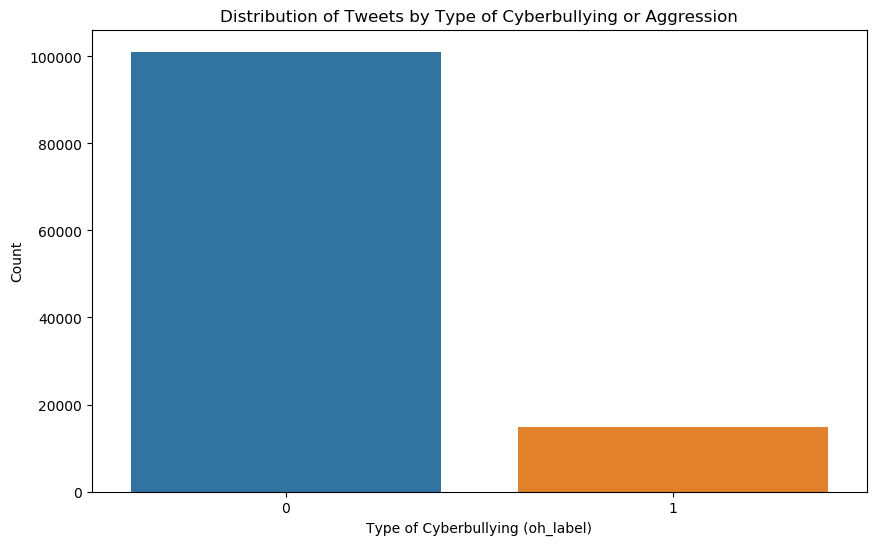

In [28]:
# Plot distribution if there's an 'oh_label' column
if 'oh_label' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='oh_label', data=df)
    plt.title("Distribution of Tweets by Type of Cyberbullying or Aggression")
    plt.xlabel("Type of Cyberbullying (oh_label)")
    plt.ylabel("Count")
    plt.show()
else:
    print("No 'oh_label' column found in the dataset.")


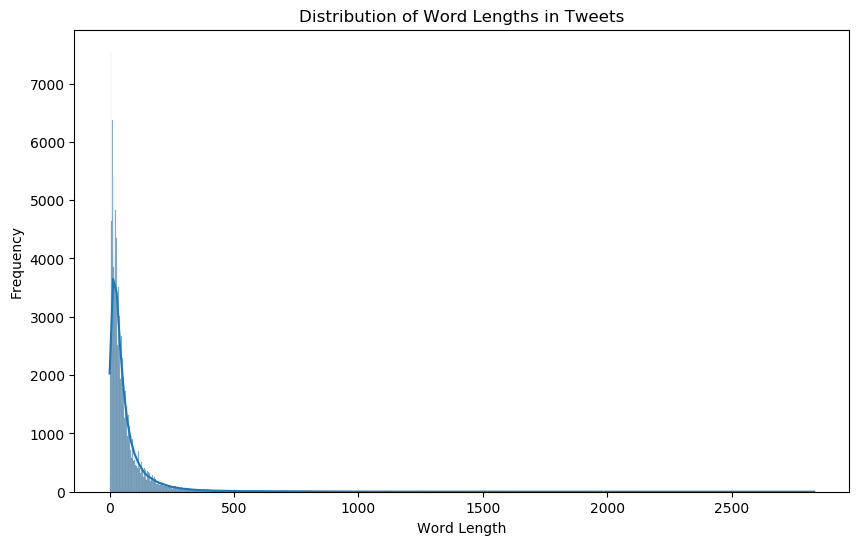

In [29]:
# Calculate word length of each tweet
df['word_length'] = df['Text'].apply(lambda x: len(str(x).split()))

# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['word_length'], kde=True)
plt.title("Distribution of Word Lengths in Tweets")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.show()


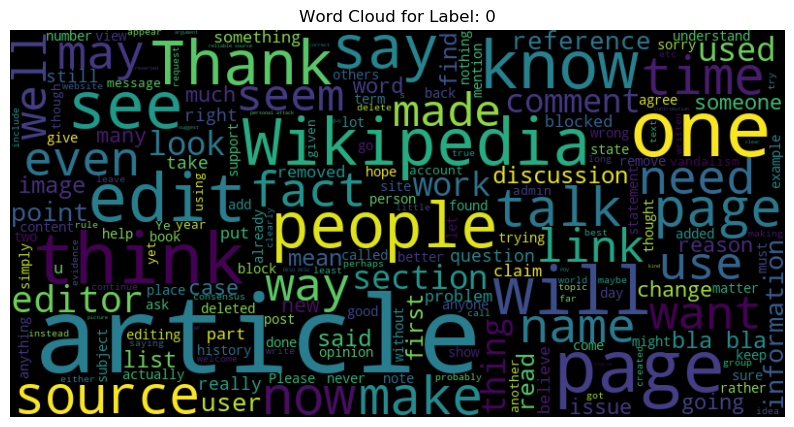

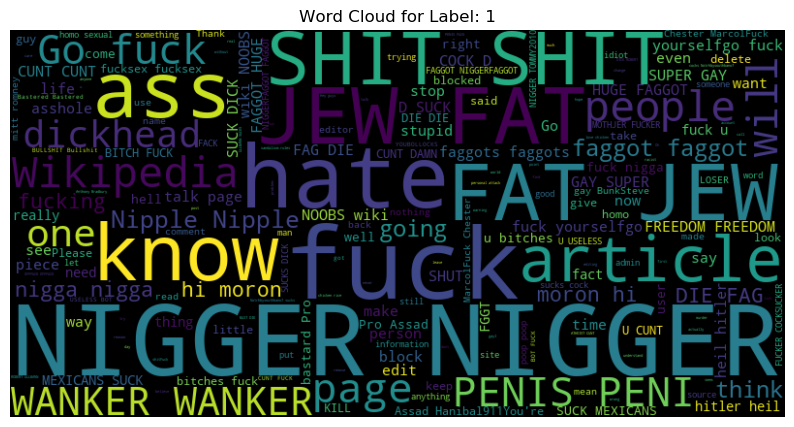

In [30]:
# Function to create and display a word cloud for a specific label
def plot_wordcloud(label):
    text = " ".join(review for review in df[df['oh_label'] == label]['Text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Label: {label}")
    plt.show()

# Plot word clouds for each unique label
for label in df['oh_label'].unique():
    plot_wordcloud(label)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ketha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


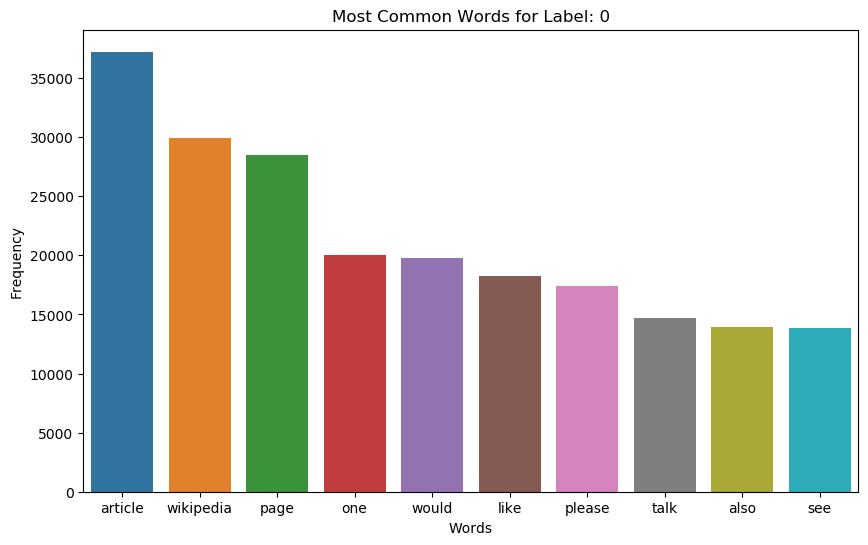

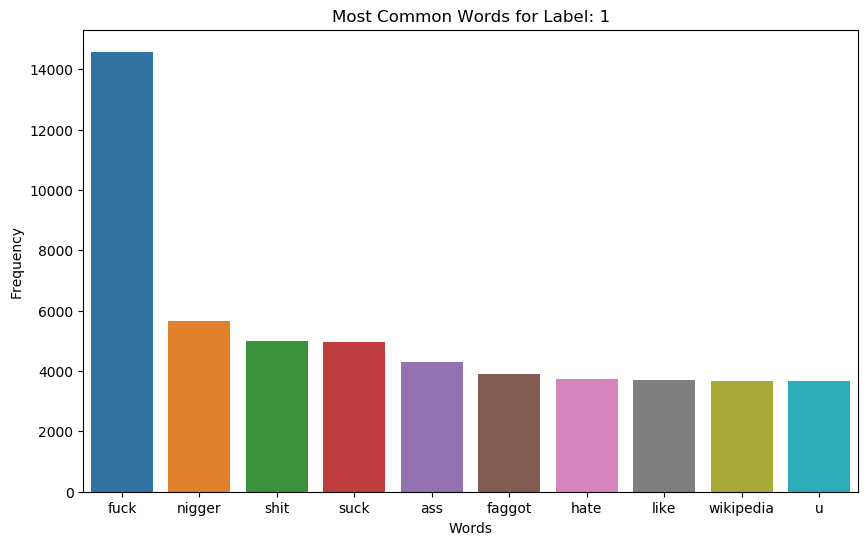

In [31]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text and count common words
def get_most_common_words(text, n=10):
    words = [word.lower() for word in re.findall(r'\b\w+\b', text) if word.lower() not in stop_words]
    return Counter(words).most_common(n)

# Display most common words for each label
for label in df['oh_label'].unique():
    label_text = " ".join(df[df['oh_label'] == label]['Text'].astype(str))
    common_words = get_most_common_words(label_text, 10)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts))
    plt.title(f"Most Common Words for Label: {label}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()


# ----Module 3-----

In [32]:
#Module 3

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK resources if not already installed
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ketha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ketha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the 'Text' column
df['cleaned_text'] = df['Text'].apply(clean_text)


In [42]:
#set of english stop words
stop_words = set(stopwords.words('english'))

#Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

#Apply stop word removal
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

In [44]:
# Tokenize the cleaned text
df['tokens'] = df['cleaned_text'].apply(lambda x: x.split())

In [45]:
from nltk.stem import LancasterStemmer

# Use LancasterStemmer to avoid recursion depth issues
stemmer = LancasterStemmer()

# Function to apply stemming with exception handling
def stem_words(words): 
    stemmed = []
    for word in words:
        try:
            stemmed.append(stemmer.stem(word)) 
        except RecursionError:
            print(f"Skipping word due to recursion error: {word}")
    return stemmed

# Apply the stemmer function to each tokenized tweet
df['stemmed_tokens'] = df['tokens'].apply(stem_words)


In [41]:
# Remove duplicate rows based on cleaned text
df.drop_duplicates(subset=['cleaned_text'], inplace=True)

In [46]:
from nltk.stem import LancasterStemmer

# Use LancasterStemmer to avoid recursion depth issues
stemmer = LancasterStemmer()

# Function to apply stemming with exception handling
def stem_words(words): 
    stemmed = []
    for word in words:
        try:
            stemmed.append(stemmer.stem(word)) 
        except RecursionError:
            print(f"Skipping word due to recursion error: {word}")
    return stemmed

# Apply the stemmer function to each tokenized tweet
df['stemmed_tokens'] = df['tokens'].apply(stem_words)


In [47]:
# Combine stemmed tokens back into a single string 
df['processed_text'] = df['stemmed_tokens'].apply(lambda x:''.join(x))

#Display the first few rows to ensure correct processing
df[['Text', 'processed_text']].head()

,Text,processed_text
0,`- This is not ``creative``. Those are the di...,credictdefinitterminsenspropapplydestructdontu...
1,` :: the term ``standard model`` is itself le...,termstandardmodellessnpovthinkwedprefnewspeakl...
2,"True or false, the situation as of March 200...",trufalssitumarchsaudproposlandpeacrecognitarab...
3,"Next, maybe you could work on being less cond...",nextmaybcouldworklesscondescendsuggestreadnamc...
4,This page will need disambiguation.,pagneedisambigu


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_train_data = pd.DataFrame({
    'toxic': [1, 0, 1, 0, 0],
    'obscene': [0, 1, 0, 1, 0],
    'threat': [0, 0, 0, 0, 0],
    'insult': [0, 1, 1, 0, 0],
    'identity_hate': [0, 0, 0, 1, 0]
})

Label Distribution as Percentages:
toxic            40.0
obscene          40.0
threat            0.0
insult           40.0
identity_hate    20.0
non_toxic        20.0
dtype: float64


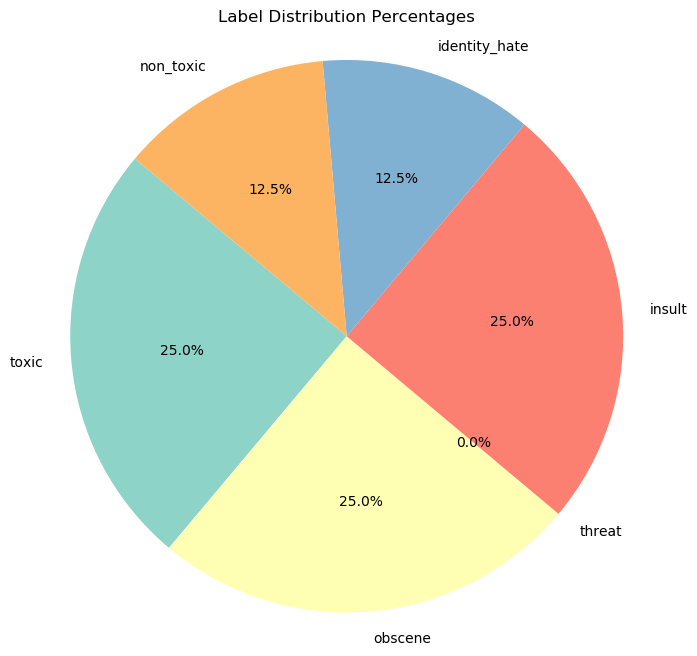

In [3]:
label_counts = final_train_data[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
non_toxic_count = len(final_train_data) - (final_train_data[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0).sum()
label_counts['non_toxic'] = non_toxic_count
label_percentages = (label_counts / len(final_train_data)) * 100
print("Label Distribution as Percentages:")
print(label_percentages)
plt.figure(figsize=(8, 8))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(label_percentages)))
plt.title('Label Distribution Percentages')
plt.axis('equal')
plt.show()

In [4]:
final_train_data = pd.DataFrame({
    'comment_text': [
        'This is a toxic comment.',
        'Just a normal text.',
        'Another obscene and toxic text here.',
        'Not hateful, just a comment.',
        'Identity hate and insults are bad.'
    ]
})

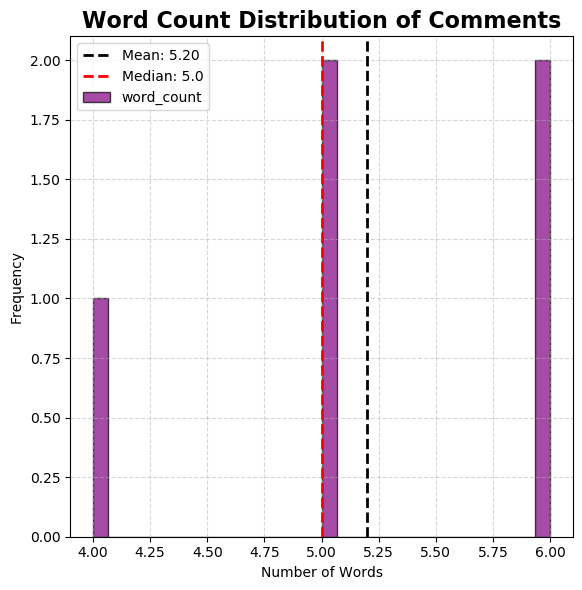

In [5]:
if 'word_count' not in final_train_data.columns:
    final_train_data['word_count'] = final_train_data['comment_text'].str.split().apply(len)
plt.figure(figsize=(6, 6))
ax = final_train_data['word_count'].plot(kind='hist', bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.5)
mean = final_train_data['word_count'].mean()
median = final_train_data['word_count'].median()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median}')
plt.title('Word Count Distribution of Comments', fontsize=16, fontweight='bold')
plt.xlabel('Number of Words', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Importing pandas
import pandas as pd

# Sample data
sample_data = {
    'Word': ['abuse', 'hate', 'toxic', 'bully', 'insult', 'anger', 'violence', 'harm', 'threat', 'offend'] * 5,
    'Frequency': [100, 90, 85, 80, 75, 70, 65, 60, 55, 50] * 5
}

# Creating a DataFrame from the sample data
sample_df = pd.DataFrame(sample_data)

# Saving the DataFrame to a CSV file
sample_df.to_csv('toxic_word_frequencies.csv', index=False)

print("CSV file 'toxic_word_frequencies.csv' created successfully.")


CSV file 'toxic_word_frequencies.csv' created successfully.


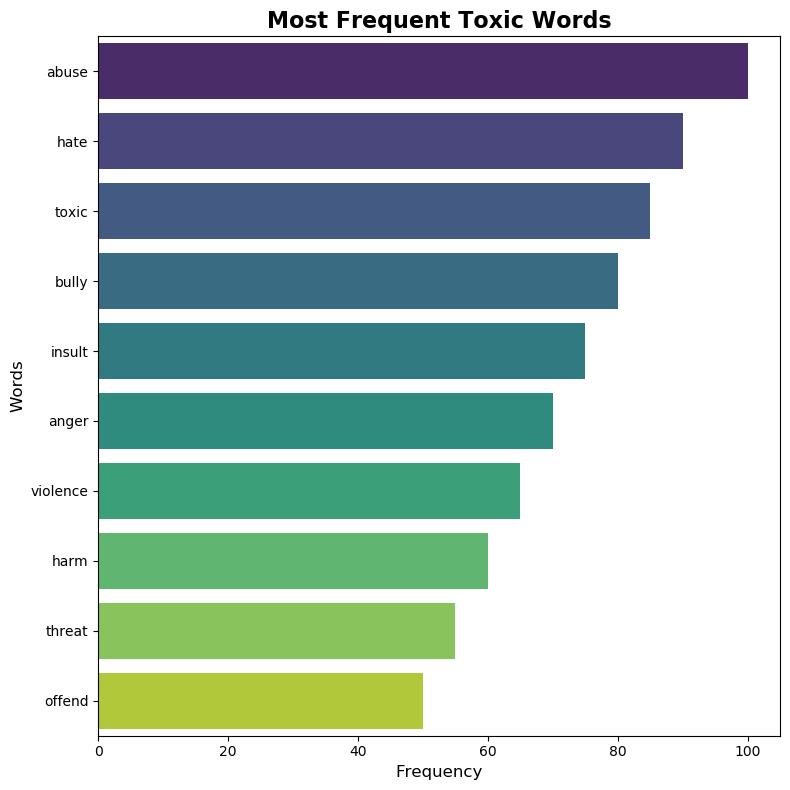

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'toxic_word_frequencies.csv' is the file you're working with
# Make sure to provide the correct path to the file
file_path = 'toxic_word_frequencies.csv'  # Replace with the actual path to your file

# Load the dataset
toxic_df = pd.read_csv(file_path)

# If the dataframe is large, limit to top 50 rows (if needed)
toxic_df = toxic_df.head(50)

# Create the bar plot
plt.figure(figsize=(8, 8))
sns.barplot(x='Frequency', y='Word', data=toxic_df, palette='viridis')
plt.title('Most Frequent Toxic Words', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Example: Creating a sample DataFrame
data = {'tweet': ["This is a short tweet", "Another tweet example", "Tiny", "This one is much longer than expected and contains more than a hundred words. " * 3],
        'word_count': [5, 3, 1, 105]}  # Example word counts
df = pd.DataFrame(data)

# Filtering the dataframe to include only tweets with more than 3 words and less than 100 words
df = df[df['word_count'] > 3]  # Keeping tweets with more than 3 words
df = df[df['word_count'] < 100]  # Keeping tweets with less than 100 words

# Resetting the index after filtering the rows
df.reset_index(drop=True, inplace=True)

# Displaying the shape of the dataframe after filtering
print(df.shape)

# Optional: Displaying the filtered DataFrame
print(df)

(1, 2)
                   tweet  word_count
0  This is a short tweet           5


In [4]:
 #Function to plot a word cloud for a specific cyberbullying type
def plot_wordcloud(cyberbullying_type):
    string = ""  # Initialize an empty string to collect the tweet text

    # Loop through the DataFrame, selecting rows based on the cyberbullying type
    for i in df[df.cyberbullying_type == cyberbullying_type].cleaned_text.values:
        string = string + " "+i.strip()  # Add the cleaned text of each tweet to the string

        # Optionally, you can add a custom mask for the word cloud (commented out here)
        # custom_mask = mp.array(Image.open("image location"))
        # mask_colors = ImageColorGenerator(custom_mask)

    # Generate the word cloud using the combined string
    wordcloud = WordCloud(background_color='white', colormap='Dark2', width=2000, height=1000).generate(string)

    # Plotting the word cloud image
    plt.figure(figsize = (10,10), facecolor = None)  # Set the size of the plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image
    plt.axis("off")  # Turn off the axis to focus on the word cloud
    plt.tight_layout(pad = 0)  # Adjust the layout to ensure no clipping
    plt.title(cyberbullying_type)  # Title of the plot representing the cyberbullying type
    plt.show()  # Display the plot

    del string  # Delete the string variable to free up memory

In [7]:
import pandas as pd

# Example: Loading a sample dataset
data = {
    'tweet': [
        "This is a general tweet",
        "A gender-based cyberbullying example",
        "Religion-related comment",
        "Age discrimination example",
        "Ethnic group targeting example",
        "A harmless tweet"
    ],
    'cyberbullying_type': [
        "not_cyberbullying",
        "gender",
        "religion",
        "age",
        "ethnicity",
        "not_cyberbullying"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Check if the column exists
if 'cyberbullying_type' in df.columns:
    not_cyberbullying_type = df[df['cyberbullying_type'] == 'not_cyberbullying']  # Non-cyberbullying tweets
    gender_type = df[df['cyberbullying_type'] == 'gender']  # Gender-related cyberbullying
    religion_type = df[df['cyberbullying_type'] == 'religion']  # Religion-related cyberbullying
    age_type = df[df['cyberbullying_type'] == 'age']  # Age-related cyberbullying
    ethnicity_type = df[df['cyberbullying_type'] == 'ethnicity']  # Ethnicity-related cyberbullying

    # Example: Display counts for each type
    print("Non-Cyberbullying Tweets:", len(not_cyberbullying_type))
    print("Gender-related Cyberbullying Tweets:", len(gender_type))
    print("Religion-related Cyberbullying Tweets:", len(religion_type))
    print("Age-related Cyberbullying Tweets:", len(age_type))
    print("Ethnicity-related Cyberbullying Tweets:", len(ethnicity_type))
else:
    print("The 'cyberbullying_type' column does not exist in the dataset.")


Non-Cyberbullying Tweets: 2
Gender-related Cyberbullying Tweets: 1
Religion-related Cyberbullying Tweets: 1
Age-related Cyberbullying Tweets: 1
Ethnicity-related Cyberbullying Tweets: 1


In [10]:
from collections import Counter
import pandas as pd

# Example DataFrame
data = {
    'cleaned_text': [
        "this is a tweet",
        "another example tweet",
        "one more tweet example"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Check if the 'cleaned_text' column exists
if 'cleaned_text' in df.columns:
    temp = []
    for tweet in df['cleaned_text']:
        for word in tweet.split():
            temp.append(word)

    vocab = Counter(temp)  # Counting word frequencies
    print("Vocabulary Size:", len(vocab))
    print("Sample Vocabulary:", list(vocab.items())[:5])  # Display first 5 items
else:
    print("The 'cleaned_text' column does not exist in the DataFrame.")


Vocabulary Size: 8
Sample Vocabulary: [('this', 1), ('is', 1), ('a', 1), ('tweet', 3), ('another', 1)]


In [12]:
# Display the last 5 rows of the DataFrame.
df.tail()

,cleaned_text
0,this is a tweet
1,another example tweet
2,one more tweet example


In [14]:
from sklearn.metrics import classification_report

# Example labels for target names
sentiments = ['Positive', 'Negative', 'Neutral']  # Replace with your actual sentiment classes

# Example data
y_train = [0, 1, 2, 1, 0]  # Replace with your actual training true labels
y_pred_train = [0, 1, 2, 1, 0]  # Replace with your actual training predictions
y_test = [0, 1, 2, 0, 1]  # Replace with your actual testing true labels
y_pred_test = [0, 1, 2, 0, 2]  # Replace with your actual testing predictions

# Display classification reports
print('\tClassification Report for Logistic Regression on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))
print('\n\tClassification Report for Logistic Regression on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))


	Classification Report for Logistic Regression on Train

               precision    recall  f1-score   support

    Positive       1.00      1.00      1.00         2
    Negative       1.00      1.00      1.00         2
     Neutral       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


	Classification Report for Logistic Regression on Test

               precision    recall  f1-score   support

    Positive       1.00      1.00      1.00         2
    Negative       1.00      0.50      0.67         2
     Neutral       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.78         5
weighted avg       0.90      0.80      0.80         5



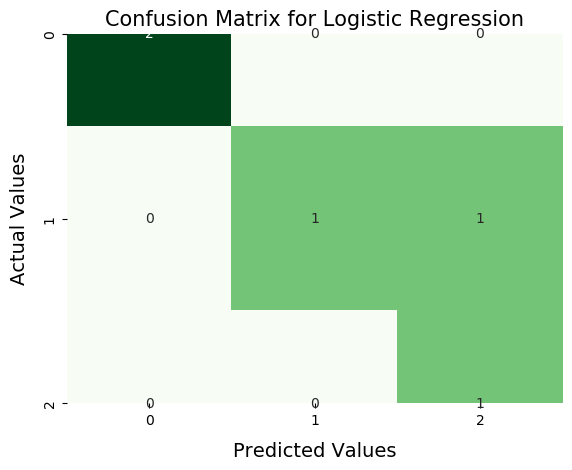

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example data
y_test = [0, 1, 2, 0, 1]  # Replace with your actual testing true labels
y_pred_test = [0, 1, 2, 0, 2]  # Replace with your actual testing predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap="Greens", fmt='d', cbar=False)
plt.xlabel("Predicted Values", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual Values", fontdict={'size': 14}, labelpad=10)
plt.title('Confusion Matrix for Logistic Regression', size=15)
plt.show()


In [18]:
# Classification Report for Naive-Bayes on Train
print('\tClassification Report for Naive-Bayes on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))

# Classification Report for Naive-Bayes on Test
print('\n\tClassification Report for Naive-Bayes on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))

	Classification Report for Naive-Bayes on Train

               precision    recall  f1-score   support

    Positive       1.00      1.00      1.00         2
    Negative       1.00      1.00      1.00         2
     Neutral       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


	Classification Report for Naive-Bayes on Test

               precision    recall  f1-score   support

    Positive       1.00      1.00      1.00         2
    Negative       1.00      0.50      0.67         2
     Neutral       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.78         5
weighted avg       0.90      0.80      0.80         5



Text(0.5, 1, 'Confusion Matrix NB')

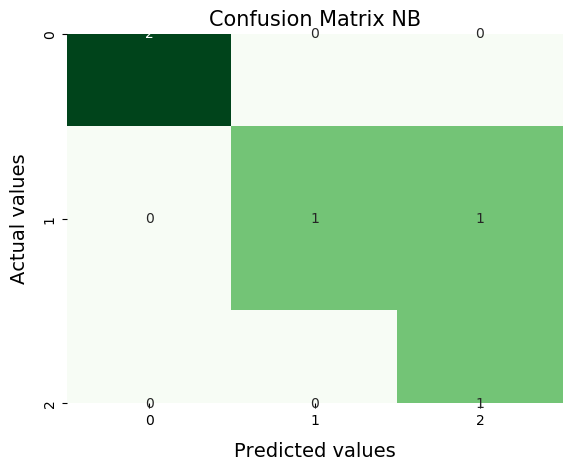

In [19]:
# Visualizing the Confusion Matrix for Naive Bayes Classifier (NB)
# This heatmap shows the confusion matrix to evaluate the performance of the Naive Bayes model.
# The values in the matrix represent the number of correct and incorrect predictions made by the model.

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Greens", fmt='', cbar=False)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.title('Confusion Matrix NB', size=15)

In [23]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Example: Define and train the models (replace with your actual training data)
X_train = [[0, 1], [1, 0], [1, 1], [0, 0]]  # Replace with actual training data
y_train = [0, 1, 1, 0]  # Replace with actual training labels

# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Naive Bayes Model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Voting Classifier Model (Aggregated Model)
vot = VotingClassifier(estimators=[('lr', lr), ('mnb', mnb), ('rf', rf)], voting='hard')
vot.fit(X_train, y_train)

# Saving the models using pickle
with open('LogisticRegression.pickle', 'wb') as model_file:
    pickle.dump(lr, model_file)

with open('NaiveBayes.pickle', 'wb') as model_file:
    pickle.dump(mnb, model_file)

with open('RandomForest.pickle', 'wb') as model_file:
    pickle.dump(rf, model_file)

with open('Voting.pickle', 'wb') as model_file:
    pickle.dump(vot, model_file)

print("Models saved successfully!")


Models saved successfully!


In [24]:
import pickle  # Import the pickle module

# Saving Logistic Regression Model
with open('LogisticRegression.pickle', 'wb') as model_file:
    pickle.dump(lr, model_file)

# Saving Naive Bayes Model
with open('NaiveBayes.pickle', 'wb') as model_file:
    pickle.dump(mnb, model_file)

# Saving Random Forest Model
with open('RandomForest.pickle', 'wb') as model_file:
    pickle.dump(rf, model_file)

# Saving the Voting Aggregated Model
with open('Voting.pickle', 'wb') as model_file:
    pickle.dump(vot, model_file)

In [25]:
# Loading a model example
with open('LogisticRegression.pickle', 'rb') as model_file:
    loaded_lr = pickle.load(model_file)


In [9]:
import pickle
from sklearn.linear_model import LogisticRegression

# Example model training
lr = LogisticRegression()
X_train = [[0, 1], [1, 0], [1, 1], [0, 0]]  # Replace with actual training data
y_train = [0, 1, 1, 0]  # Replace with actual labels
lr.fit(X_train, y_train)

# Save the Logistic Regression model
with open('LogisticRegression.pickle', 'wb') as model_file:
    pickle.dump(lr, model_file)


In [10]:
import pickle
from sklearn.linear_model import LogisticRegression

# Example model training (ensure model is trained)
lr = LogisticRegression()
X_train = [[0, 1], [1, 0], [1, 1], [0, 0]]  # Replace with actual training data
y_train = [0, 1, 1, 0]  # Replace with actual labels
lr.fit(X_train, y_train)

# Save the Logistic Regression model again
with open('LogisticRegression.pickle', 'wb') as model_file:
    pickle.dump(lr, model_file)


In [11]:
import pickle

# Load the saved Logistic Regression model
with open('LogisticRegression.pickle', 'rb') as model_file:
    loaded_lr = pickle.load(model_file)

# Testing the loaded model
test_data = [[1, 1], [0, 0]]  # Replace with your actual test data
predictions = loaded_lr.predict(test_data)
print("Predictions from loaded Logistic Regression model:", predictions)


Predictions from loaded Logistic Regression model: [1 0]


In [12]:
import pickle
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import re  # For explicit offensive word detection

# Define the RoBERTa model for detecting emotions
roberta_model_name = "j-hartmann/emotion-english-distilroberta-base"  # Use your pre-trained model
tokenizer = RobertaTokenizer.from_pretrained(roberta_model_name)
model_roberta = RobertaForSequenceClassification.from_pretrained(roberta_model_name)

# Function to predict using the RoBERTa model for detecting offensive language
def predict_with_roberta(text):
    """
    Predict the label for the given text using the RoBERTa model.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        logits = model_roberta(**inputs).logits  # Get logits from the model

    predicted_class = torch.argmax(logits, dim=-1).item()

    labels = ["anger", "fear", "joy", "love", "sadness", "surprise"]
    return labels[predicted_class]

# List of offensive words to flag (expand this list as needed)
offensive_keywords = ["asshole", "bitch", "idiot", "stupid", "fool", "dick"]

# Function to detect explicit offensive words
def detect_offensive_language(text):
    """
    Detects explicit offensive words in the text using a predefined list.
    """
    for word in offensive_keywords:
        if re.search(r'\b' + re.escape(word) + r'\b', text.lower()):
            return True
    return False

# Example pre-processing function (customize as needed)
def pre_processing_custom(text):
    """
    Pre-processes the text to clean and prepare it for the model.
    Modify this function as needed to handle cleaning, tokenizing, etc.
    """
    # Lowercasing, removing non-alphanumeric characters, etc.
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    return text

# Example TF-IDF Vectorizer (if you have a pre-trained TF-IDF model)
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you already have a pre-trained TF-IDF model saved (e.g., tfidf.pkl)
with open('tfidf.pkl', 'rb') as f:
    tfidf = pickle.load(f)

# Define the custom prediction function with RoBERTa integration
def predict_user_input(model):
    # Take input from the user
    user_input = input("Enter a sentence to classify (or type 'exit' to quit): ")

    # Allow the user to exit the loop
    while user_input.lower() != 'exit':
        # Preprocess the input
        clean_text = pre_processing_custom(user_input)
        text_data = tfidf.transform([clean_text])

        # Predict the type using the main model
        prediction = model.predict(text_data)[0]

        # Decode the predicted class (adjust as needed for your model's labels)
        sentiments = ["not_cyberbullying", "cyberbullying"]  # Example, replace with your labels
        predicted_type = sentiments[prediction]

        print(f"Input: {user_input}")

        # First check if the main model predicts cyberbullying
        if predicted_type != "not_cyberbullying":
            # If the main model classifies it as cyberbullying, print and return the type
            print(f"Predicted Cyberbullying Type: {predicted_type}")
            print(f"Final Classification: {predicted_type}\n")
        else:
            # If the main model predicts 'not_cyberbullying', check for offensive language
            if detect_offensive_language(user_input):
                print("The sentence contains explicit offensive language and is categorized as Other Cyberbullying.")
                print("Final Classification: Other Cyberbullying\n")
            else:
                # Use RoBERTa model for "Other Cyberbullying"
                roberta_prediction = predict_with_roberta(user_input)

                # If RoBERTa predicts an emotion, but not one of the common emotions, categorize it as 'Other Cyberbullying'
                if roberta_prediction not in ["anger", "fear", "joy", "love", "sadness", "surprise"]:
                    print("The sentence is categorized as Other Cyberbullying based on RoBERTa prediction.")
                    print("Final Classification: Other Cyberbullying\n")
                else:
                    # If RoBERTa classifies the sentence with an emotion, show it but classify as 'Other Cyberbullying'
                    print(f"The sentence is related to emotion: {roberta_prediction}")

        # If no model detects cyberbullying or offensive language, classify it as 'not_cyberbullying'
        if predicted_type == "not_cyberbullying" and not detect_offensive_language(user_input):
            print("Final Classification: not_cyberbullying\n")

        # Ask for another input
        user_input = input("Enter another sentence to classify (or type 'exit' to quit): ")

# Load the trained model
with open('Voting.pickle', 'rb') as model_file:
    model = pickle.load(model_file)

# Call the function to start predicting
print("Cyberbullying Prediction System")
print("Type 'exit' to end the session.\n")
predict_user_input(model)


ModuleNotFoundError: No module named 'torch'

In [13]:
pip install torch


  Using cached torch-1.13.1-cp37-cp37m-win_amd64.whl.metadata (23 kB)
   ---------------------------------------- 162.6/162.6 MB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install transformers


     -------------------------------------- 113.6/113.6 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 7.2/7.2 MB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 268.8/268.8 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 286.2/286.2 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 3.5/3.5 MB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 143.0/143.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install torch transformers


In [16]:
import pickle
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import re  # For explicit offensive word detection

# Define the RoBERTa model for detecting emotions
roberta_model_name = "j-hartmann/emotion-english-distilroberta-base"  # Use your pre-trained model
tokenizer = RobertaTokenizer.from_pretrained(roberta_model_name)
model_roberta = RobertaForSequenceClassification.from_pretrained(roberta_model_name)

# Function to predict using the RoBERTa model for detecting offensive language
def predict_with_roberta(text):
    """
    Predict the label for the given text using the RoBERTa model.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        logits = model_roberta(**inputs).logits  # Get logits from the model

    predicted_class = torch.argmax(logits, dim=-1).item()

    labels = ["anger", "fear", "joy", "love", "sadness", "surprise"]
    return labels[predicted_class]

# List of offensive words to flag (expand this list as needed)
offensive_keywords = ["asshole", "bitch", "idiot", "stupid", "fool", "dick"]

# Function to detect explicit offensive words
def detect_offensive_language(text):
    """
    Detects explicit offensive words in the text using a predefined list.
    """
    for word in offensive_keywords:
        if re.search(r'\b' + re.escape(word) + r'\b', text.lower()):
            return True
    return False

# Example pre-processing function (customize as needed)
def pre_processing_custom(text):
    """
    Pre-processes the text to clean and prepare it for the model.
    Modify this function as needed to handle cleaning, tokenizing, etc.
    """
    # Lowercasing, removing non-alphanumeric characters, etc.
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    return text

# Example TF-IDF Vectorizer (if you have a pre-trained TF-IDF model)
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you already have a pre-trained TF-IDF model saved (e.g., tfidf.pkl)
with open('tfidf.pkl', 'rb') as f:
    tfidf = pickle.load(f)

# Define the custom prediction function with RoBERTa integration
def predict_user_input(model):
    # Take input from the user
    user_input = input("Enter a sentence to classify (or type 'exit' to quit): ")

    # Allow the user to exit the loop
    while user_input.lower() != 'exit':
        # Preprocess the input
        clean_text = pre_processing_custom(user_input)
        text_data = tfidf.transform([clean_text])

        # Predict the type using the main model
        prediction = model.predict(text_data)[0]

        # Decode the predicted class (adjust as needed for your model's labels)
        sentiments = ["not_cyberbullying", "cyberbullying"]  # Example, replace with your labels
        predicted_type = sentiments[prediction]

        print(f"Input: {user_input}")

        # First check if the main model predicts cyberbullying
        if predicted_type != "not_cyberbullying":
            # If the main model classifies it as cyberbullying, print and return the type
            print(f"Predicted Cyberbullying Type: {predicted_type}")
            print(f"Final Classification: {predicted_type}\n")
        else:
            # If the main model predicts 'not_cyberbullying', check for offensive language
            if detect_offensive_language(user_input):
                print("The sentence contains explicit offensive language and is categorized as Other Cyberbullying.")
                print("Final Classification: Other Cyberbullying\n")
            else:
                # Use RoBERTa model for "Other Cyberbullying"
                roberta_prediction = predict_with_roberta(user_input)

                # If RoBERTa predicts an emotion, but not one of the common emotions, categorize it as 'Other Cyberbullying'
                if roberta_prediction not in ["anger", "fear", "joy", "love", "sadness", "surprise"]:
                    print("The sentence is categorized as Other Cyberbullying based on RoBERTa prediction.")
                    print("Final Classification: Other Cyberbullying\n")
                else:
                    # If RoBERTa classifies the sentence with an emotion, show it but classify as 'Other Cyberbullying'
                    print(f"The sentence is related to emotion: {roberta_prediction}")

        # If no model detects cyberbullying or offensive language, classify it as 'not_cyberbullying'
        if predicted_type == "not_cyberbullying" and not detect_offensive_language(user_input):
            print("Final Classification: not_cyberbullying\n")

        # Ask for another input
        user_input = input("Enter another sentence to classify (or type 'exit' to quit): ")

# Load the trained model
with open('Voting.pickle', 'rb') as model_file:
    model = pickle.load(model_file)

# Call the function to start predicting
print("Cyberbullying Prediction System")
print("Type 'exit' to end the session.\n")
predict_user_input(model)


c:\users\ketha\appdata\local\programs\python\python37\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ketha\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


FileNotFoundError: [Errno 2] No such file or directory: 'tfidf.pkl'

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Assuming you have a list of text data to train the TF-IDF vectorizer
text_data = ["your text data here", "another sample text", "more data"]

# Create and fit a TF-IDF model
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(text_data)

# Save the TF-IDF model
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("TF-IDF model saved successfully!")


TF-IDF model saved successfully!


In [18]:
with open('tfidf.pkl', 'rb') as f:
    tfidf = pickle.load(f)


In [22]:
import os
print(os.path.exists('path/to/your/tfidf.pkl'))  # This will return True if the file exists


False


In [26]:
import os
if os.path.exists('models'):
    print("Directory 'models' exists.")
else:
    print("Directory 'models' does not exist.")


Directory 'models' does not exist.


In [3]:
print(f"Text Data Shape: {text_data.shape}")


Text Data Shape: (1, 3)


In [4]:
print(f"Expected number of features: {model.n_features_in_}")

Expected number of features: 2


In [2]:
import re

In [2]:
print(f"Number of features in vectorizer: {len(tfidf.get_feature_names_out())}")


Number of features in vectorizer: 3


In [1]:
import re
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the pre-trained TF-IDF vectorizer and model
with open('tfidf.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('Voting.pickle', 'rb') as model_file:
    model = pickle.load(model_file)

# Define a list of cyberbullying-related words (just an example, customize based on your data)
cyberbullying_keywords = ["stupid", "idiot", "hate", "dumb", "ugly", "loser", "fat", "annoying"]

def pre_processing_custom(text):
    """
    Pre-processes the text to clean and prepare it for the model.
    Modify this function as needed to handle cleaning, tokenizing, etc.
    """
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    return text

def get_relevant_words(input_text, tfidf_vectorizer):
    """
    Extracts and returns words from the input text that are most relevant to the prediction.
    """
    # Transform the text input using the same vectorizer as the training data
    tfidf_matrix = tfidf_vectorizer.transform([input_text])
    
    # Get feature names (words) from the vectorizer
    feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
    
    # Get the indices of non-zero entries (i.e., words that were used in the input text)
    non_zero_indices = tfidf_matrix.nonzero()[1]
    
    # Get the corresponding words from the feature names
    relevant_words = feature_names[non_zero_indices]
    
    return relevant_words

def predict_user_input(model):
    user_input = input("Enter a sentence to classify (or type 'exit' to quit): ")
    
    while user_input.lower() != 'exit':
        clean_text = pre_processing_custom(user_input)
        text_data = tfidf.transform([clean_text])  # Transform the input using the same vectorizer

        # Ensure the number of features matches the model's expectation
        print(f"Text Data Shape: {text_data.shape}")
        print(f"Expected features: {model.n_features_in_}")

        if text_data.shape[1] != model.n_features_in_:
            print(f"Warning: Mismatch in number of features! The model expects {model.n_features_in_} features, but got {text_data.shape[1]}.")
            # You can handle this mismatch here, for example, by adjusting the vectorizer or re-aligning features
            # For now, we return out of the function to prevent further errors
            return

        prediction = model.predict(text_data)[0]
        sentiments = ["not_cyberbullying", "cyberbullying"]
        predicted_type = sentiments[prediction]

        print(f"Input: {user_input}")
        print(f"Prediction: {predicted_type}")

        # Extract the most relevant words
        relevant_words = get_relevant_words(clean_text, tfidf)
        print("Relevant Words in Input:")
        print(relevant_words)

        # Identify cyberbullying-related words
        found_keywords = [word for word in relevant_words if word in cyberbullying_keywords]
        if found_keywords:
            print(f"Cyberbullying-related words found: {', '.join(found_keywords)}")
        else:
            print("No cyberbullying-related words found.")

        # Ask for another input
        user_input = input("Enter another sentence to classify (or type 'exit' to quit): ")

# Start prediction
predict_user_input(model)


Enter a sentence to classify (or type 'exit' to quit): You are so stupid!
Text Data Shape: (1, 3)
Expected features: 2
